<a href="https://colab.research.google.com/github/aadomingos/TeamSlowtus/blob/main/SonomaRaceRound1_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# basic imports required
import pandas as pd
import numpy as np

In [2]:
# mount your Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# write path to your Google Drive folder that contains the data
file = '/content/drive/My Drive/Team Slowtus/Data Log Dec 04 2021 09_20 AM.csv'

# concatenate CSV files into one dataframe
racing_data = pd.read_csv(file, header=1, skiprows=0)
racing_data.head(10)



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (91,166) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Frame Number,Frame Time (h:m:s.ms),Frame Time (ms),Frame Time (delta),Forward Acceleration,Forward Acceleration.1,Lateral Acceleration,Lateral Acceleration.1,Vehicle Roll,Vehicle Roll.1,Vehicle Pitch,Vehicle Pitch.1,GPS Latitude,GPS Latitude.1,GPS Longitude,GPS Longitude.1,GPS Altitude,GPS Altitude.1,GPS Altitude.2,GPS Horizontal Accuracy,GPS Horizontal Accuracy.1,GPS Horizontal Accuracy.2,GPS Vertical Accuracy,GPS Vertical Accuracy.1,GPS Vertical Accuracy.2,GPS Course (Direction of Travel),GPS Course (Direction of Travel).1,GPS Vehicle Speed,GPS Vehicle Speed.1,GPS Vehicle Speed.2,Engine Coolant Temperature,Engine Coolant Temperature.1,Engine Coolant Temperature.2,Intake Manifold Absolute Pressure,Intake Manifold Absolute Pressure.1,Intake Manifold Absolute Pressure.2,Engine RPM,Engine RPM.1,Vehicle Speed Sensor,Vehicle Speed Sensor.1,...,Current acceleration based on the last two speed readings.2,Manage values displyed on Fillup dashboard,Manage values displyed on Fillup dashboard.1,Average fuel consumption for each trip,Average fuel consumption for each trip.1,Average fuel consumption for each trip.2,Calculated engine power,Calculated engine power.1,Calculated engine power.2,Acceleration expressed as g (gravity),Acceleration expressed as g (gravity).1,Average fuel economy/consumption since last fuel consumption reset,Average fuel economy/consumption since last fuel consumption reset.1,Average fuel economy/consumption since last fuel consumption reset.2,Average fuel economy/consumption since last fuel consumption reset.3,Average fuel economy/consumption since last fuel consumption reset.4,Average fuel economy/consumption since last fuel consumption reset.5,Trip gear statistic,Trip gear statistic.1,CO2 emission calculations for each trip,CO2 emission calculations for each trip.1,Fuel price entered at last fillup,Fuel price entered at last fillup.1,Fuel price entered at last fillup.2,Calculated engine torque,Calculated engine torque.1,Calculated engine torque.2,Trip power stats; Max,Trip power stats; Max.1,Trip power stats; Max.2,Fuel cost for each trip,Fuel cost for each trip.1,Fuel consumption correction factor based on fillup adjustment,Fuel consumption correction factor based on fillup adjustment.1,Fuel consumption correction factor based on fillup adjustment.2,"Trip acceleration; Max forward, Max Braking","Trip acceleration; Max forward, Max Braking.1",Trip torque stats; Max,Trip torque stats; Max.1,Trip torque stats; Max.2
0,0,0:0:0.025,25,25,31,-0.02,31,-0.03,31,3,31,-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,147,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0:0:0.052,52,27,134,-0.02,134,-0.03,134,3,134,-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,147,64,52.0,15.7,53.0,89.0,1210.0,132.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0:0:0.005,5,-47,236,-0.02,236,-0.02,236,3,236,-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,147,64,52.0,15.7,53.0,89.0,1210.0,132.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0:0:0.267,267,262,236,-0.02,236,-0.02,236,3,236,-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,147,64,52.0,15.7,53.0,89.0,1210.0,132.0,0.0,...,0.0,269.0,"0.131000,0.000000,3.50",269.0,"1.400000,1.400000,1.600000,0.000000,1.400000","170.300000,170.300000,144.300000,0.000000,170....",269.0,6.0,4.0,132.0,0.0,271.0,### NAN or INF ###,0.0,272.0,NaN,NaN,272.0,NaN,269.0,"2.544000,2.544000,2.155000,0.000000,2.544000,2...",269.0,3.5,3.5,269.0,24.0,32.0,269.0,"28.660394,28.660394,28.660394,25.577066,2

In [4]:
racing_data.tail(10)

,Frame Number,Frame Time (h:m:s.ms),Frame Time (ms),Frame Time (delta),Forward Acceleration,Forward Acceleration.1,Lateral Acceleration,Lateral Acceleration.1,Vehicle Roll,Vehicle Roll.1,Vehicle Pitch,Vehicle Pitch.1,GPS Latitude,GPS Latitude.1,GPS Longitude,GPS Longitude.1,GPS Altitude,GPS Altitude.1,GPS Altitude.2,GPS Horizontal Accuracy,GPS Horizontal Accuracy.1,GPS Horizontal Accuracy.2,GPS Vertical Accuracy,GPS Vertical Accuracy.1,GPS Vertical Accuracy.2,GPS Course (Direction of Travel),GPS Course (Direction of Travel).1,GPS Vehicle Speed,GPS Vehicle Speed.1,GPS Vehicle Speed.2,Engine Coolant Temperature,Engine Coolant Temperature.1,Engine Coolant Temperature.2,Intake Manifold Absolute Pressure,Intake Manifold Absolute Pressure.1,Intake Manifold Absolute Pressure.2,Engine RPM,Engine RPM.1,Vehicle Speed Sensor,Vehicle Speed Sensor.1,...,Current acceleration based on the last two speed readings.2,Manage values displyed on Fillup dashboard,Manage values displyed on Fillup dashboard.1,Average fuel consumption for each trip,Average fuel consumption for each trip.1,Average fuel consumption for each trip.2,Calculated engine power,Calculated engine power.1,Calculated engine power.2,Acceleration expressed as g (gravity),Acceleration expressed as g (gravity).1,Average fuel economy/consumption since last fuel consumption reset,Average fuel economy/consumption since last fuel consumption reset.1,Average fuel economy/consumption since last fuel consumption reset.2,Average fuel economy/consumption since last fuel consumption reset.3,Average fuel economy/consumption since last fuel consumption reset.4,Average fuel economy/consumption since last fuel consumption reset.5,Trip gear statistic,Trip gear statistic.1,CO2 emission calculations for each trip,CO2 emission calculations for each trip.1,Fuel price entered at last fillup,Fuel price entered at last fillup.1,Fuel price entered at last fillup.2,Calculated engine torque,Calculated engine torque.1,Calculated engine torque.2,Trip power stats; Max,Trip power stats; Max.1,Trip power stats; Max.2,Fuel cost for each trip,Fuel cost for each trip.1,Fuel consumption correction factor based on fillup adjustment,Fuel consumption correction factor based on fillup adjustment.1,Fuel consumption correction factor based on fillup adjustment.2,"Trip acceleration; Max forward, Max Braking","Trip acceleration; Max forward, Max Braking.1",Trip torque stats; Max,Trip torque stats; Max.1,Trip torque stats; Max.2
141375,141375,2:46:15.927,9975927,100,3539060,-0.09,3539060,0.3,3539060,-18,3539060,-15,3538734.0,38.15975,3538734.0,-122.45345,3538734.0,-100.0,-30.0,3538734.0,32.0,10.0,3538734.0,32.0,10.0,3538734.0,-1.0,3538734.0,0.0,0.0,2027598,207,97,2027686.0,12.7,43.0,2027723.0,687.0,2027752.0,0.0,...,-0.0,2030655.0,"3.894000,0.000000,3.50",2030655.0,"14.400000,14.400000,14.500000,0.000000,14.400000","16.300000,16.300000,16.200000,0.000000,16.300000",2030655.0,4.0,3.0,2027752.0,-0.0,2030657.0,12.7,18.5,2027752.0,14.4,16.3,2030658.0,NaN,2030655.0,"75.456000,75.456000,75.067000,0.000000,75.4560...",2030655.0,3.5,3.5,2030655.0,29.0,39.0,2030655.0,"180.071281,180.071281,180.071281,25.577066,180...","134.279154,134.279154,134.279154,19.072818,134...",2030655.0,"13.628989,13.628989,13.558774,0.070214,13.628989",2030655.0,0.0,1.0,2027752.0,"2.899016,2.899016,2.899016,0.000000,2.899016,3...",2030655.0,"184.598519,184.598519,184.598519,78.601959,184...","250.315592,250.315592,250.315592,106.584256,25..."
141376,141376,2:46:16.028,9976028,101,3539161,-0.09,3539161,0.3,3539161,-18,3539161,-15,3538734.0,38.15975,3538734.0,-122.45345,3538734.0,-100.0,-30.0,3538734.0,32.0,10.0,3538734.0,32.0,10.0,3538734.0,-1.0,3538734.0,0.0,0.0,2027598,207,97,2027686.0,12.7,43.0,2027723.0,687.0,2027752.0,0.0,...,-0.0,2030655.0,"3.894000,0.000000,3.50",2030655.0,"14.400000,14.400000,14.500000,0.000000,14.400000","16.300000,16.300000,16.200000,0.000000,16.300000",2030655.0,4.0,3.0,2027752.0,-0.0,2030657.0,12.7,18.5,2027752.0,14.4,16.3,2030658

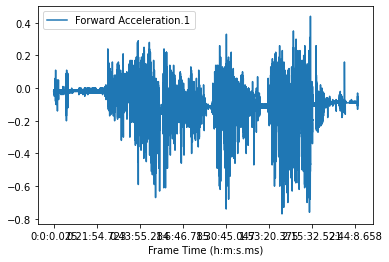

In [5]:
lines = racing_data.plot.line(x='Frame Time (h:m:s.ms)', y='Forward Acceleration.1')

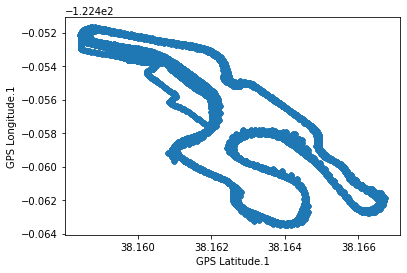

In [6]:
scatter = racing_data.plot.scatter(x='GPS Latitude.1', y='GPS Longitude.1')

In [7]:
racing_data_clean = racing_data[['Frame Time (ms)', 'Forward Acceleration.1', 'GPS Latitude.1', 'GPS Longitude.1'\
                                 ,'Engine Coolant Temperature.1', 'Engine RPM.1', 'Vehicle Speed Sensor.1']]

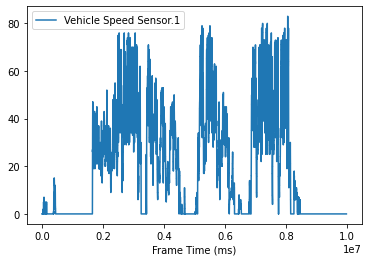

In [8]:
racing_data_clean.plot.line(x='Frame Time (ms)', y='Vehicle Speed Sensor.1')

In [9]:
# convert miliseconds to seconds
racing_data_clean['Time'] = racing_data_clean['Frame Time (ms)'].div(1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


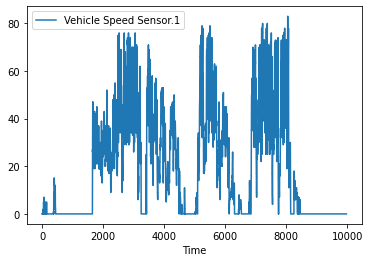

In [10]:
racing_data_clean.plot.line(x='Time', y='Vehicle Speed Sensor.1')

In [11]:
racing_data_clean.columns

Index(['Frame Time (ms)', 'Forward Acceleration.1', 'GPS Latitude.1',
       'GPS Longitude.1', 'Engine Coolant Temperature.1', 'Engine RPM.1',
       'Vehicle Speed Sensor.1', 'Time'],
      dtype='object')

In [12]:
racing_data_clean.rename(columns={'Forward Acceleration.1':'X', 'GPS Latitude.1':'Latitude', 'GPS Longitude.1':'Longitude'\
                                  , 'Engine Coolant Temperature.1':'CoolantTemp', 'Engine RPM.1':'RPM', 'Vehicle Speed Sensor.1':'MPH'}, inplace=True)

racing_data_clean.drop(columns=['Frame Time (ms)'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
racing_data_clean = racing_data_clean[['Time', 'MPH', 'RPM', 'X', 'CoolantTemp', 'Latitude', 'Longitude']]

racing_data_clean.head(25)

,Time,MPH,RPM,X,CoolantTemp,Latitude,Longitude
0,0.025,NaN,NaN,-0.02,147,NaN,NaN
1,0.052,0.0,1210.0,-0.02,147,NaN,NaN
2,0.005,0.0,1210.0,-0.02,147,NaN,NaN
3,0.267,0.0,1210.0,-0.02,147,NaN,NaN
4,0.318,0.0,1210.0,-0.02,147,NaN,NaN
5,0.356,0.0,1198.0,-0.02,147,NaN,NaN
6,0.476,0.0,1198.0,-0.02,147,NaN,NaN
7,0.539,0.0,1198.0,-0.02,147,NaN,NaN
8,0.563,0.0,1190.0,-0.02,147,38.15987,-122.45344
9,0.621,0.0,1190.0,-0.02,147,38.15987,-122.45344


In [34]:
racing_data_clean = racing_data_clean[(racing_data_clean.Time >= 1650) & (racing_data_clean.Time <= 5000)]

In [35]:
racing_data_clean.tail(10)

,Time,MPH,RPM,X,CoolantTemp,Latitude,Longitude
73343,4999.155,0.0,1079.0,-0.11,219,38.1598,-122.45333
73344,4999.256,0.0,1079.0,-0.11,219,38.1598,-122.45333
73345,4999.357,0.0,1079.0,-0.11,219,38.1598,-122.45333
73346,4999.470,0.0,1079.0,-0.11,219,38.1598,-122.45333
73347,4999.570,0.0,1079.0,-0.11,219,38.1598,-122.45333
73348,4999.606,0.0,1079.0,-0.11,219,38.1598,-122.45334
73349,4999.670,0.0,1079.0,-0.11,219,38.1598,-122.45334
73350,4999.771,0.0,1079.0,-0.11,219,38.1598,-122.45334
73351,4999.872,0.0,1079.0,-0.11,219,38.1598,-122.45334
73352,4999.972,0.0,1079.0,-0.11,219,38.1598,-122.45334


In [36]:
racing_data_clean.to_csv('/content/drive/My Drive/Team Slowtus/Sonoma_Race_Data_120421_0920.csv')